In [2]:
import numpy as np
from matplotlib import pyplot as plt

0.02522449979658925 -0.7687435544938719


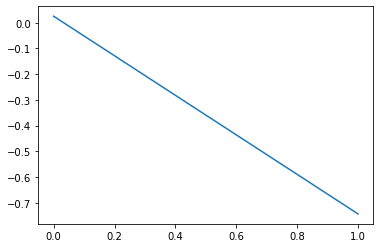

In [4]:
intercept = np.random.random()
slope = -np.random.random()

plt.plot([0, 1], [intercept, intercept + slope * 1])
print(intercept, slope)

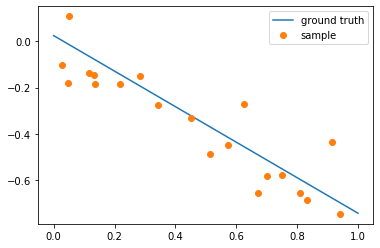

In [10]:
n = 20
X = np.random.uniform(size = n)
X.sort()
y = intercept + slope * X + np.random.normal(0, 0.1, size = n)

plt.plot([0, 1], [intercept, intercept + slope * 1], label = "ground truth")
plt.plot(X, y, 'o', label = "sample")
plt.legend()

In [13]:
XX = np.array([np.ones_like(X), X]).T
XX

array([[1.        , 0.02645335],
       [1.        , 0.0458681 ],
       [1.        , 0.05028313],
       [1.        , 0.11479395],
       [1.        , 0.13235577],
       [1.        , 0.13685211],
       [1.        , 0.21668125],
       [1.        , 0.28269143],
       [1.        , 0.3421034 ],
       [1.        , 0.45004162],
       [1.        , 0.51388954],
       [1.        , 0.57294227],
       [1.        , 0.62637297],
       [1.        , 0.67016052],
       [1.        , 0.70161377],
       [1.        , 0.74881846],
       [1.        , 0.81003164],
       [1.        , 0.83324482],
       [1.        , 0.91303034],
       [1.        , 0.94147956]])

In [14]:
# @ is np matrix multiplication
W = XX.T @ XX
W

array([[20.        ,  9.12970799],
       [ 9.12970799,  6.0584445 ]])

In [17]:
# Slope and intercept approximations
intercept_, slope_ = np.linalg.inv(XX.T @ XX) @ XX.T @ y
print(intercept, intercept_, slope, slope_)

0.02522449979658925 -0.04233738525288878 -0.7687435544938719 -0.6869341377116425


In [20]:
A = np.array([[1, 2], [3, 4]])
print(A * A)
print(A @ A)
print(A.dot(A))

[[ 1  4]
 [ 9 16]]
[[ 7 10]
 [15 22]]
[[ 7 10]
 [15 22]]


In [21]:
# First array returns slope and intercept approximations
np.linalg.lstsq(XX, y)

/Users/Ellsworth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([-0.04233739, -0.68693414]),
 array([0.20216945]),
 2,
 array([4.95135135, 1.24200013]))

In [25]:
# Assign intercept_ and slope_ with first array, ignore the rest using the star or spread operator *
(intercept_, slope_), *_ = np.linalg.lstsq(XX, y, rcond = -1)
print(intercept_, slope_)

-0.04233738525288892 -0.6869341377116419


In [27]:
X_test = np.random.uniform(size = 3)
X_test

array([0.93144331, 0.27647151, 0.06539795])

In [30]:
weights = np.array([np.ones_like(X_test), X_test]).T @ np.linalg.inv(XX.T @ XX) @ XX.T

In [33]:
y_test = weights.dot(y)

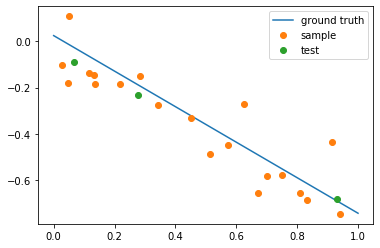

In [34]:
plt.plot([0, 1], [intercept, intercept + slope * 1], label = "ground truth")
plt.plot(X, y, 'o', label = "sample")
plt.plot(X_test, y_test, 'o', label = "test")
plt.legend()

In [35]:
from sklearn.linear_model import LinearRegression

In [38]:
M = LinearRegression(fit_intercept = False)
M.fit(X.reshape(-1, 1), y)
yy_test = M.predict(X_test.reshape(-1, 1))

In [39]:
yy_test == y_test

array([False, False, False])

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils import check_array, check_X_y

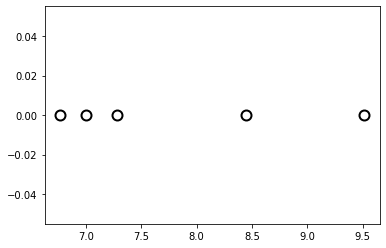

In [41]:
np.random.seed(666)
X = 10*np.random.uniform(size=5)
X.sort()
plt.plot(X, [0 for x in X], 'o', color=(0,0,0,0), mec='k', mew=2, ms=10)

In [50]:
def nn(x, X): # 1 - nearest neighbor
    np.abs(X - x)    

In [43]:
x = 5
np.abs(X - x)

array([1.76514336, 2.00437122, 2.27858057, 3.44186643, 4.51457957])

In [46]:
# Index of the maximum
print(np.argmax(np.abs(X - x)))

# Maximum
print(np.max(np.abs(X - x)))

4
4.514579574463394


In [48]:
# Index of the minimum
print(np.argmin(np.abs(X - x)))

# Minimum
print(np.min(np.abs(X - x)))

0
1.7651433593762542


In [53]:
def nn(x, X, y):
    return y[np.argmin(np.abs(X - x))]
y = np.random.uniform(size = X.shape)
print(y)
nn(x, X, y)

[0.77447945 0.00510884 0.11285765 0.11095367 0.24766823]


0.7744794542685887

In [54]:
x = np.array([5, 9])
np.abs(X - x)

ValueError: operands could not be broadcast together with shapes (5,) (2,) 

In [60]:
print(x)
print(X)
print(y)
print(np.abs(X.reshape(-1, 1) - x.reshape(1, -1)))
print(np.argmin(np.abs(X.reshape(-1, 1) - x.reshape(1, -1)), axis = 0))
print(y[np.argmin(np.abs(X.reshape(-1, 1) - x.reshape(1, -1)), axis = 0)])

[5 9]
[6.76514336 7.00437122 7.27858057 8.44186643 9.51457957]
[0.77447945 0.00510884 0.11285765 0.11095367 0.24766823]
[[1.76514336 2.23485664]
 [2.00437122 1.99562878]
 [2.27858057 1.72141943]
 [3.44186643 0.55813357]
 [4.51457957 0.51457957]]
[0 4]
[0.77447945 0.24766823]


In [70]:
x = 5
k = 3
distances = np.abs(X - x)
distances.sort()
distances

array([1.76514336, 2.00437122, 2.27858057, 3.44186643, 4.51457957])

In [71]:
np.argsort(distances)

array([0, 1, 2, 3, 4])